FIXED power tariff problem, now it is calculated monthly

ADDED spot prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob

In [2]:
all_files = glob.glob('EVCS_15_results.db')
print(all_files)

storage = pd.DataFrame()

for filename in glob.glob('EVCS_15_results.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    SOC_pen = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)

    scalars = pd.read_sql_query('SELECT * FROM scalarvariables', con)
    

    
    
    con.close()


# Demand
demand = pd.read_csv('demand_analysis.tsv', sep = ',')

['EVCS_15_results.db']


In [3]:
scalars


,name,level,lo,up,marginal
0,var_ess_rated_power,173.968750,0.000000e+00,1.000000e+100,0.0
1,var_grid_maxpower1,222.591250,0.000000e+00,1.000000e+100,0.0
2,var_grid_maxpower2,264.807500,0.000000e+00,1.000000e+100,0.0
3,var_grid_maxpower3,180.000000,0.000000e+00,1.000000e+100,0.0
4,var_grid_maxpower4,225.501250,0.000000e+00,1.000000e+100,0.0
5,var_ESS_cost,30618.500000,0.000000e+00,1.000000e+100,0.0
6,var_electricity_cost,141094.161756,0.000000e+00,1.000000e+100,0.0
7,var_grid_tariff_winter,70553.808901,0.000000e+00,1.000000e+100,0.0
8,var_energy_tax,3602.265477,0.000000e+00,1.000000e+100,0.0
9,months,4.283482,0.000000e+00,1.000000e+100,0.0


In [4]:
print(max(grid_power['level'].iloc[0:8634]))
print(max(grid_extra_power['level'].iloc[0:8634]))

180.0
42.59125000000003


In [5]:
print(max(grid_power['level'].iloc[8635:17269]))
print(max(grid_extra_power['level'].iloc[8635:17269]))

180.0
84.80750000000012


In [6]:
print(max(grid_power['level'].iloc[17270:25903]))
print(max(grid_extra_power['level'].iloc[17270:25903]))

180.0
0.0


In [7]:
print(max(grid_power['level'].iloc[25904:34541]))
print(max(grid_extra_power['level'].iloc[25904:34541]))

180.0
45.501250000000056


In [8]:
battery_1 = ESS_power['level']

In [9]:
discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        

Text(0.5, 0, 'ESS Discharge Power [kW]')

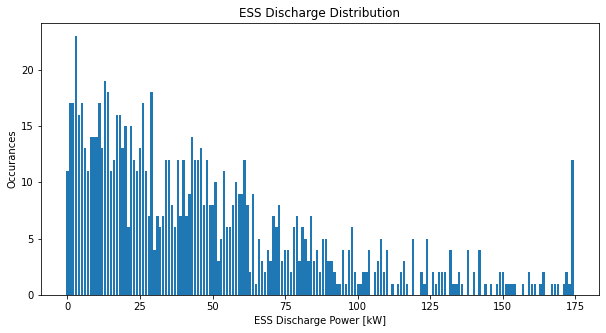

In [10]:
a = [round(num,0) for num in discharge_1]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times)
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

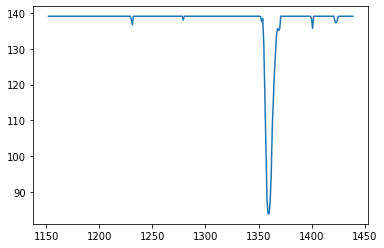

In [11]:
plt.plot(ESS_level['level'].iloc[1152:1440])

In [12]:
import stat

print(ESS_level['level'].mean())
print(ESS_level['level'].median())
print(ESS_level['level'].mode())
print(ESS_level['level'].min())

138.54426914749786
139.17499999999998
0    139.175
dtype: float64
27.834999999999997


In [13]:
b = ESS_level['level']

a = [round(num,0) for num in b]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

Text(0.5, 0, 'ESS SoC [kWh]')

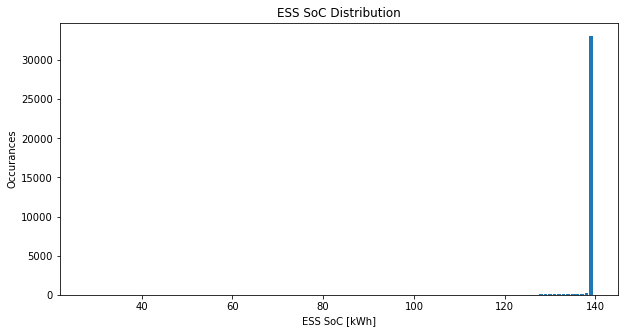

In [14]:
plt.figure(figsize = (10,5))
plt.bar(names, times)
plt.title('ESS SoC Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS SoC [kWh]')

In [25]:
demand = pd.read_csv('demand_analysis.tsv', sep = ',')
demand['All'] = demand['C1'] + demand['C2'] + demand['C3'] + demand['C4'] + demand['C5'] + demand['C6'] + demand['C7'] + demand['C8']
demand


,DateTime,C3,C4,C5,C6,C7,C8,C1,C2,All
0,2021-11-01 00:00:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
1,2021-11-01 00:05:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
2,2021-11-01 00:10:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
3,2021-11-01 00:15:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
4,2021-11-01 00:20:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34537,2022-02-28 23:35:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34538,2022-02-28 23:40:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34539,2022-02-28 23:45:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34540,2022-02-28 23:50:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0


In [26]:
df = pd.DataFrame()
df['DateTime'] = pd.to_datetime(demand['DateTime'])
df['Grid Power kW'] = grid_power['level']
df['Grid Extra Power kW'] = grid_extra_power['level']
df['Total Grid Power kW'] = grid_total_power['level']
df['Grid Energy kWh'] = grid_energy['level']
df['Grid Extra Energy kWh'] = grid_extra_energy['level']
df['ESS Level kWh']= ESS_level['level']
df['ESS Power kW'] = ESS_power['level']
df['ESS SOC %'] = np.array(SOC)
df['Demand kW'] = dem
#df.set_index('DateTime')
df

NameError: name 'SOC' is not defined